In [117]:
import pandas as pd
import numpy as np
import sqlalchemy
from functools import partial
from sqlalchemy import create_engine
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
pwd

'C:\\Users\\liqui'

In [119]:
engine= create_engine('sqlite:///13w-mta.db')

In [120]:
def get_data(Month_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for Month_num in Month_nums:
        file_url = url.format(Month_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
Month_nums = [210102, 210109, 210116,210123,210130,210206,210213,210220,210227,210306,210313,210320,210327]
turnstiles_df = get_data(Month_nums)
turnstiles_df.to_csv("data.csv",index=False)

In [121]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689


In [122]:
turnstiles_df.columns# Checking columns names

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [123]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [124]:
turnstiles_df.shape

(2719827, 11)

In [125]:
turnstiles_df.info()#Checking general info about dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719827 entries, 0 to 209469
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 249.0+ MB


In [126]:
turnstiles_df.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [127]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.719827e+06,2.719827e+06
mean,4.230827e+07,3.403484e+07
std,2.189880e+08,1.948386e+08
min,0.000000e+00,0.000000e+00
25%,2.268300e+05,9.431400e+04
50%,1.534464e+06,9.124190e+05
75%,6.191778e+06,4.061412e+06
max,2.128721e+09,2.123073e+09


In [128]:
turnstiles_df["TURNSTILE"] = turnstiles_df["C/A"]+"-"+turnstiles_df["UNIT"]+"-"+turnstiles_df["SCP"]

turnstiles_df.head(10)
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,03:00:00,REGULAR,7508858,2557705,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,07:00:00,REGULAR,7508862,2557711,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,11:00:00,REGULAR,7508885,2557743,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778,A002-R051-02-00-00


In [129]:
turnstiles_df['DATETIME'] = turnstiles_df["DATE"]+ " " +turnstiles_df["TIME"]

turnstiles_df['DATETIME'] = pd.to_datetime(turnstiles_df['DATETIME'], format='%m/%d/%Y %H:%M:%S')

turnstiles_df.info()# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719827 entries, 0 to 209469
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATETIME   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 290.5+ MB


In [130]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.719827e+06,2.719827e+06
mean,4.230827e+07,3.403484e+07
std,2.189880e+08,1.948386e+08
min,0.000000e+00,0.000000e+00
25%,2.268300e+05,9.431400e+04
50%,1.534464e+06,9.124190e+05
75%,6.191778e+06,4.061412e+06
max,2.128721e+09,2.123073e+09


In [132]:
turnstiles_df.DATE.value_counts().sort_index()

01/01/2021    30696
01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
              ...  
12/27/2020    29971
12/28/2020    30150
12/29/2020    29877
12/30/2020    29953
12/31/2020    29976
Name: DATE, Length: 91, dtype: int64

In [133]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [134]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,A002-R051-02-00-00,2020-12-26 03:00:00,2020-12-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,A002-R051-02-00-00,2020-12-26 07:00:00,2020-12-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,A002-R051-02-00-00,2020-12-26 11:00:00,2020-12-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,A002-R051-02-00-00,2020-12-26 15:00:00,2020-12-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,A002-R051-02-00-00,2020-12-26 19:00:00,2020-12-26 19:00:00


In [135]:
len(turnstiles_df["STATION"].unique())#Checking Unique Station count

378

In [136]:
len(turnstiles_df["TURNSTILE"].unique())#Checking Unique TURNSTILE count


5039

In [137]:
print("Row count based on stations (First 10 rows)")#Checking some columns value's counts

print(turnstiles_df["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     55529
FULTON ST          52325
GRD CNTRL-42 ST    48796
23 ST              39879
86 ST              35420
CANAL ST           31617
59 ST              30586
CHAMBERS ST        29949
34 ST-HERALD SQ    29526
ATL AV-BARCLAY     28138
Name: STATION, dtype: int64


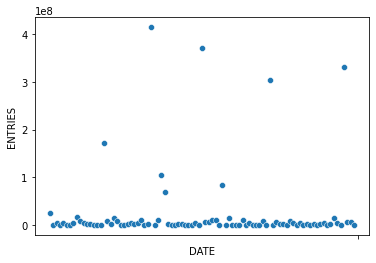

In [174]:
ax = sns.scatterplot(x="DATE", y="ENTRIES", data=turnstiles_df)
plt.xticks("")
plt.show()#Understanding data-2 with scatterplot


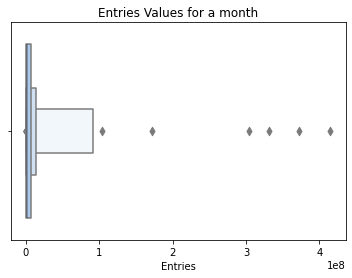

In [175]:
ax = sns.boxenplot(x='ENTRIES', data=turnstiles_df,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")
#Understanding data-2 with boxenplot

In [138]:
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020,12,26).date()))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DATE_TIME
186601,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,12/26/2020,03:00:00,REGULAR,10642211,1898589,R504-R276-00-00-01,2020-12-26 03:00:00,2020-12-26 03:00:00
186602,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,12/26/2020,07:00:00,REGULAR,10642215,1898594,R504-R276-00-00-01,2020-12-26 07:00:00,2020-12-26 07:00:00
186603,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,12/26/2020,11:00:00,REGULAR,10642249,1898615,R504-R276-00-00-01,2020-12-26 11:00:00,2020-12-26 11:00:00
186604,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,12/26/2020,15:00:00,REGULAR,10642311,1898637,R504-R276-00-00-01,2020-12-26 15:00:00,2020-12-26 15:00:00
186605,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,12/26/2020,19:00:00,REGULAR,10642378,1898672,R504-R276-00-00-01,2020-12-26 19:00:00,2020-12-26 19:00:00


In [139]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,A002-R051-02-00-00,2020-12-26 03:00:00,2020-12-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,A002-R051-02-00-00,2020-12-26 07:00:00,2020-12-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,A002-R051-02-00-00,2020-12-26 11:00:00,2020-12-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,A002-R051-02-00-00,2020-12-26 15:00:00,2020-12-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,A002-R051-02-00-00,2020-12-26 19:00:00,2020-12-26 19:00:00


In [140]:
(turnstiles_df
 .groupby(["DATE"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(7)# 

,DATE,ENTRIES
0,01/01/2021,30696
1,01/02/2021,30595
7,01/08/2021,30417
10,01/11/2021,30393
11,01/12/2021,30320
54,02/24/2021,30245
77,03/19/2021,30167


In [141]:
(turnstiles_df
 .groupby(["TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(7)

,TIME,ENTRIES
6932,03:00:00,199199
44749,19:00:00,199148
16473,07:00:00,199101
35356,15:00:00,199098
25942,11:00:00,199096
54062,23:00:00,198918
37719,16:00:00,179653


In [142]:
turnstiles_df.sort_values(["DATE"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["DATE"], inplace=True)

In [143]:
turnstiles_df.DESC.value_counts()

REGULAR       89
RECOVR AUD     2
Name: DESC, dtype: int64

In [144]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DATE_TIME
157572,R221,R170,01-03-00,14 ST-UNION SQ,456LNQRW,IRT,12/31/2020,04:00:00,REGULAR,25266667,31723080,R221-R170-01-03-00,2020-12-31 04:00:00,2020-12-31 04:00:00
198135,R551,R072,01-03-07,34 ST-HUDSON YD,7,IRT,12/30/2020,19:00:00,REGULAR,197577,551436,R551-R072-01-03-07,2020-12-30 19:00:00,2020-12-30 19:00:00
175947,R308,R344,00-00-00,145 ST,3,IRT,12/29/2020,15:00:00,REGULAR,4671703,470815,R308-R344-00-00-00,2020-12-29 15:00:00,2020-12-29 15:00:00
112592,N600,R302,00-05-00,57 ST,F,IND,12/28/2020,20:00:00,REGULAR,347444,233486,N600-R302-00-05-00,2020-12-28 20:00:00,2020-12-28 20:00:00
76952,N210,R253,00-00-02,174-175 STS,BD,IND,12/27/2020,23:00:00,REGULAR,4636619,2092616,N210-R253-00-00-02,2020-12-27 23:00:00,2020-12-27 23:00:00


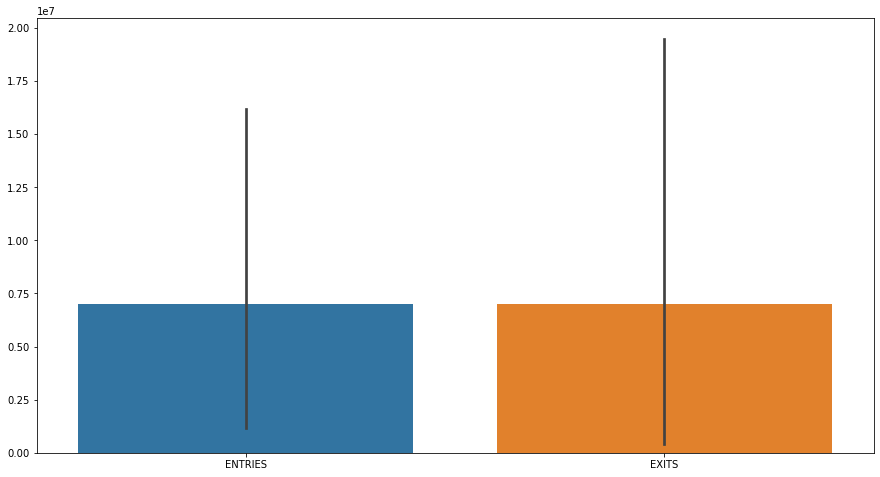

In [145]:
plt.figure(figsize=(15,8))
sns.barplot(data=turnstiles_df.head())
plt.show()

In [146]:
pd

<module 'pandas' from 'C:\\Users\\liqui\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [147]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,9.100000e+01,9.100000e+01
mean,2.350481e+07,4.479529e+07
std,7.580310e+07,2.309573e+08
min,0.000000e+00,0.000000e+00
25%,1.916670e+05,5.589500e+04
50%,1.969262e+06,7.465300e+05
75%,7.128940e+06,4.913937e+06
max,4.148492e+08,1.596077e+09


In [148]:
turnstiles_df.corr()

,ENTRIES,EXITS
ENTRIES,1.000000,0.596499
EXITS,0.596499,1.000000


In [149]:
turnstiles_df.DATE.value_counts()

01/31/2021    1
02/26/2021    1
01/23/2021    1
12/27/2020    1
01/17/2021    1
             ..
03/09/2021    1
01/20/2021    1
01/03/2021    1
02/12/2021    1
02/25/2021    1
Name: DATE, Length: 91, dtype: int64

In [150]:
G=turnstiles_df

In [151]:
G

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DATE_TIME
157572,R221,R170,01-03-00,14 ST-UNION SQ,456LNQRW,IRT,12/31/2020,04:00:00,REGULAR,25266667,31723080,R221-R170-01-03-00,2020-12-31 04:00:00,2020-12-31 04:00:00
198135,R551,R072,01-03-07,34 ST-HUDSON YD,7,IRT,12/30/2020,19:00:00,REGULAR,197577,551436,R551-R072-01-03-07,2020-12-30 19:00:00,2020-12-30 19:00:00
175947,R308,R344,00-00-00,145 ST,3,IRT,12/29/2020,15:00:00,REGULAR,4671703,470815,R308-R344-00-00-00,2020-12-29 15:00:00,2020-12-29 15:00:00
112592,N600,R302,00-05-00,57 ST,F,IND,12/28/2020,20:00:00,REGULAR,347444,233486,N600-R302-00-05-00,2020-12-28 20:00:00,2020-12-28 20:00:00
76952,N210,R253,00-00-02,174-175 STS,BD,IND,12/27/2020,23:00:00,REGULAR,4636619,2092616,N210-R253-00-00-02,2020-12-27 23:00:00,2020-12-27 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26246,D005,R398,00-00-00,NEW UTRECHT AV,ND,BMT,01/05/2021,00:00:00,REGULAR,130384,32068,D005-R398-00-00-00,2021-01-05 00:00:00,2021-01-05 00:00:00
80528,N305,R017,01-03-04,LEXINGTON AV/53,EM6,IND,01/04/2021,15:00:00,REGULAR,331359993,1596076818,N305-R017-01-03-04,2021-01-04 15:00:00,2021-01-04 15:00:00
174908,R303,R324,00-00-01,116 ST,23,IRT,01/03/2021,08:00:00,REGULAR,6038709,4128974,R303-R324-00-00-01,2021-01-03 08:00:00,2021-01-03 08:00:00
21300,C009,R057,03-03-03,ATL AV-BARCLAY,BDNQR2345,BMT,01/02/2021,07:00:00,REGULAR,6987314,6318416,C009-R057-03-03-03,2021-01-02 07:00:00,2021-01-02 07:00:00


In [152]:
G.STATION.value_counts()

JAY ST-METROTEC    3
CITY / BUS         3
GRD CNTRL-42 ST    2
34 ST-PENN STA     2
34 ST-HERALD SQ    2
                  ..
THIRTY THIRD ST    1
225 ST             1
57 ST              1
ROCKAWAY AV        1
NEWKIRK AV         1
Name: STATION, Length: 76, dtype: int64

In [153]:
R=G.STATION.value_counts()

In [154]:
R

JAY ST-METROTEC    3
CITY / BUS         3
GRD CNTRL-42 ST    2
34 ST-PENN STA     2
34 ST-HERALD SQ    2
                  ..
THIRTY THIRD ST    1
225 ST             1
57 ST              1
ROCKAWAY AV        1
NEWKIRK AV         1
Name: STATION, Length: 76, dtype: int64

In [155]:
O=(R.sort_values(ascending=False)).head(5)

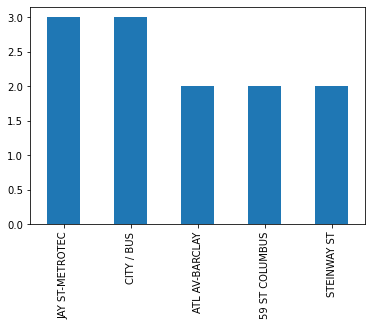

In [156]:
O.plot.bar(stacked=False);

In [157]:
summary1=G.groupby(['STATION']).agg({'ENTRIES':'sum','EXITS':'sum'})

In [158]:
summary1

,ENTRIES,EXITS
STATION,,
116 ST,6038709,4128974
14 ST-UNION SQ,42597321,42094375
145 ST,4671703,470815
14TH STREET,26659,470098
174-175 STS,4636619,2092616
...,...,...
VAN SICLEN AV,667739,295481
WALL ST,3176849,5326339
WILSON AV,7270565,5408524


In [159]:
summary2=summary1.head(10)

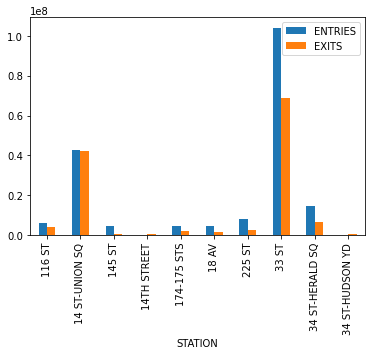

In [160]:
summary2.plot.bar(stacked=False);

In [164]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DATE_TIME
157572,R221,R170,01-03-00,14 ST-UNION SQ,456LNQRW,IRT,12/31/2020,04:00:00,REGULAR,25266667,31723080,R221-R170-01-03-00,2020-12-31 04:00:00,2020-12-31 04:00:00
198135,R551,R072,01-03-07,34 ST-HUDSON YD,7,IRT,12/30/2020,19:00:00,REGULAR,197577,551436,R551-R072-01-03-07,2020-12-30 19:00:00,2020-12-30 19:00:00
175947,R308,R344,00-00-00,145 ST,3,IRT,12/29/2020,15:00:00,REGULAR,4671703,470815,R308-R344-00-00-00,2020-12-29 15:00:00,2020-12-29 15:00:00
112592,N600,R302,00-05-00,57 ST,F,IND,12/28/2020,20:00:00,REGULAR,347444,233486,N600-R302-00-05-00,2020-12-28 20:00:00,2020-12-28 20:00:00
76952,N210,R253,00-00-02,174-175 STS,BD,IND,12/27/2020,23:00:00,REGULAR,4636619,2092616,N210-R253-00-00-02,2020-12-27 23:00:00,2020-12-27 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26246,D005,R398,00-00-00,NEW UTRECHT AV,ND,BMT,01/05/2021,00:00:00,REGULAR,130384,32068,D005-R398-00-00-00,2021-01-05 00:00:00,2021-01-05 00:00:00
80528,N305,R017,01-03-04,LEXINGTON AV/53,EM6,IND,01/04/2021,15:00:00,REGULAR,331359993,1596076818,N305-R017-01-03-04,2021-01-04 15:00:00,2021-01-04 15:00:00
174908,R303,R324,00-00-01,116 ST,23,IRT,01/03/2021,08:00:00,REGULAR,6038709,4128974,R303-R324-00-00-01,2021-01-03 08:00:00,2021-01-03 08:00:00
21300,C009,R057,03-03-03,ATL AV-BARCLAY,BDNQR2345,BMT,01/02/2021,07:00:00,REGULAR,6987314,6318416,C009-R057-03-03-03,2021-01-02 07:00:00,2021-01-02 07:00:00


In [165]:
DT=G.groupby(['DATE','TIME']).agg({'ENTRIES':'sum'})

In [166]:
DT

,,ENTRIES
DATE,TIME,
01/01/2021,11:00:00,804748
01/02/2021,07:00:00,6987314
01/03/2021,08:00:00,6038709
01/04/2021,15:00:00,331359993
01/05/2021,00:00:00,130384
...,...,...
12/27/2020,23:00:00,4636619
12/28/2020,20:00:00,347444
12/29/2020,15:00:00,4671703


In [167]:
DT1=DT.head(7)

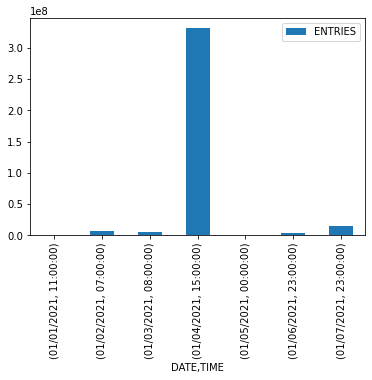

In [168]:
DT1.plot.bar(stacked=False);

In [78]:
mask = (turnstiles_df['STATION'] == '59 ST')

In [79]:
turnstiles_df_59ST = turnstiles_df[mask] 

In [80]:
turnstiles_df_59ST.shape

(30586, 11)